<a id="1"></a>
# <b><p style="background-image: url();font-family:tahoma;font-size:120%;color:Navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c"> Table Of Content</p></b>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(); background-size: cover">

## <span style="text-align:center; font-weight:bolder; color:navy; font-size:130%">Table of Contents:</span>

 * **[Step 1 | Python Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Importing Data](#load_data)
    -  [2.2 | Data Informations](#info)
    -  [2.3 | Columns Explanation](#col)
 *  **[Step 3 | visualizations](#visualizations)**
    -  [3.1 | Plots](#plots)
    -  [3.2 | Coorelations](#corr)
 *  **[Step 4 | Preprocessing](#prep)**
    -  [4.1 | Missing Values Handling](#missing)
    -  [4.2 | Normalization](#norm)
 *  **[Step 5 | Modeling](#ml)**
    -  [5.1 | Initialization](#init)
    -  [5.2 | LogisticRegression](#lr)
    -  [5.3 | RandomForestClassifier](#rf)
    -  [5.4 | MLPClassifier](#mlp)
    -  [5.5 | KNeighborsClassifier](#knn)
    -  [5.6 | Result](#result)
 *  **[Author](#author)**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

print(colored('All libraries imported succesfully', 'green'))

All libraries imported succesfully


In [2]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [3]:
print(colored('\nAll libraries Configed succesfully.', 'green'))


All libraries Configed succesfully.


# import data

In [4]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# drop first column (Unnamed: 0)
data.drop(columns='Unnamed: 0', inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
categoricals = ['cut', 'color', 'clarity']
non_categoricals = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [8]:
data[non_categoricals].describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
carat,0.200000,0.797940,0.474011,5.010000
depth,43.000000,61.749405,1.432621,79.000000
table,43.000000,57.457184,2.234491,95.000000
price,326.000000,3932.799722,3989.439738,18823.000000
x,0.000000,5.731157,1.121761,10.740000
y,0.000000,5.734526,1.142135,58.900000
z,0.000000,3.538734,0.705699,31.800000


In [9]:
data[categoricals].describe().T

,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


In [10]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
# # Plot for categorical values
# fig, ax = plt.subplots(3, 1, figsize=(15, 15))
# plt.subplots_adjust(hspace = 0.5)
# for i in range(len(categoricals)) :
#     sns.countplot(x=categoricals[i], data=data[categoricals], ax=ax[i], palette='turbo').set_title(categoricals[i], fontsize=20, fontweight='bold')
#     for container in ax[i].containers:
#         ax[i].bar_label(container)

In [12]:
# # Plot for categorical values
# fig, ax = plt.subplots(7, 1, figsize=(15, 20))
# plt.subplots_adjust(hspace = 0.5)
# for i in range(len(non_categoricals)) :
#     sns.boxplot(x=non_categoricals[i], data=data[non_categoricals], ax=ax[i]).set_title(non_categoricals[i], fontsize=15, fontweight='bold')

In [13]:
len1 = len(data)
condition1 = data.x > 0
condition2 = data.y > 0
condition3 = data.z > 0

data = data[condition1]
data = data[condition2]
data = data[condition3]

len2 = len(data)
print(colored('{} samles deleted'.format(len1-len2), 'blue'))

20 samles deleted


In [14]:
data = data.reset_index(drop=True)

In [15]:
# corr = data[non_categoricals].corr()
# plt.figure(figsize=(10, 5))
# sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
# plt.show()

In [16]:
# sns.pairplot(data, hue='price', corner=True, palette='Blues')
# plt.show()

# replace categorical values by integers

In [17]:
categoricals

['cut', 'color', 'clarity']

### cut

In [18]:
data.cut.value_counts()

cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

In [19]:
cut_vaues = {
            'Ideal' :  1,
            'Premium' : 2,
            'Very Good' : 3,
            'Good' : 4,
            'Fair': 5,
}

data.cut = data.cut.replace(cut_vaues)

### color

In [20]:
data.color.value_counts()

color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

In [21]:
color_values = {
                'G' : 1,
                'E' : 2,
                'F' : 3,
                'H' : 4,
                'D' : 5,
                'I' : 6,
                'J' : 7,
}
data.color = data.color.replace(color_values)

### clarity

In [22]:
data.clarity.value_counts()

clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64

In [23]:
clarity_values = {
                'SI1' : 1,
                'VS2' : 2,
                'SI2' : 3,
                'VS1' : 4,
                'VVS2' : 5,
                'VVS1' : 6,
                'IF' : 7,
                'I1' : 8
}
data.clarity = data.clarity.replace(clarity_values)

In [24]:
print(colored('All categorical datas replaced with integer values', 'green'))

All categorical datas replaced with integer values


In [25]:
X = data.drop(columns='price')
y = data.price

# Normalization

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
df = pd.DataFrame(scaler, columns=X.columns)

In [27]:
df.describe().loc[['min', 'std', '50%', 'max']].style.background_gradient(axis=0)

,carat,cut,color,clarity,depth,table,x,y,z
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,0.098502,0.279145,0.303417,0.255787,0.039787,0.042963,0.159689,0.020647,0.022861
50%,0.103950,0.250000,0.333333,0.285714,0.522222,0.269231,0.281027,0.036762,0.080052
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [31]:
X_train.shape

(43136, 9)

# Import NN

In [32]:
import keras
from keras import models
from keras.layers import Dense, Flatten

In [72]:
# model = models.Sequential()
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import Adam


hidden_units1 = 300
hidden_units2 = 700
hidden_units3 = 500
hidden_units4 = 300
learning_rate = 0.01

model = models.Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(hidden_units4, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])


# Compile
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle])

# Fit
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/30
540/540 [==============================] - 5s 8ms/step - loss: 0.4813 - mean_squared_logarithmic_error: 0.4806 - val_loss: 0.0689 - val_mean_squared_logarithmic_error: 0.0689
Epoch 2/30
540/540 [==============================] - 4s 7ms/step - loss: 0.0577 - mean_squared_logarithmic_error: 0.0576 - val_loss: 0.0634 - val_mean_squared_logarithmic_error: 0.0634
Epoch 3/30
540/540 [==============================] - 4s 7ms/step - loss: 0.0588 - mean_squared_logarithmic_error: 0.0587 - val_loss: 0.0529 - val_mean_squared_logarithmic_error: 0.0529
Epoch 4/30
540/540 [==============================] - 4s 7ms/step - loss: 0.0568 - mean_squared_logarithmic_error: 0.0568 - val_loss: 0.0499 - val_mean_squared_logarithmic_error: 0.0499
Epoch 5/30
540/540 [==============================] - 4s 7ms/step - loss: 0.0567 - mean_squared_logarithmic_error: 0.0568 - val_loss: 0.0994 - val_mean_squared_logarithmic_error: 0.0994
Epoch 6/30
540/540 [==============================] - 4s 7ms/step - lo

In [73]:
model.evaluate(X_test, y_test)

337/337 [==============================] - 1s 2ms/step - loss: 0.0146 - mean_squared_logarithmic_error: 0.0146


[0.014550304040312767, 0.014550304040312767]

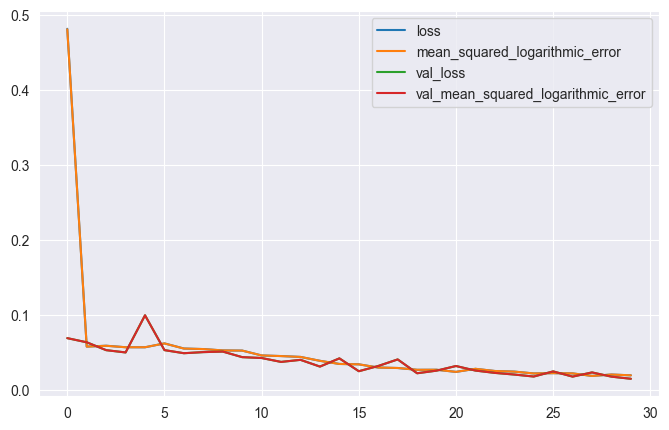

In [74]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

# RandomForestRegressor

In [94]:
# # a dictionary to define parameters to test in algorithm
# parameters = {'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 1000, 'n_jobs': -1}

# rf = RandomForestRegressor(**rf_cv.best_params_).fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)

# rf_score = round(rf.score(X_test, y_test), 3)
# print(colored('RandomForestClassifier Score : {}'.format(rf_score), 'green'))

In [93]:
# mse = metrics.mean_squared_log_error(y_pred_rf, y_test)
# print(mse)